In [ ]:
%load_ext autoreload

In [1]:
# import Inicializacion
# # %matplotlib inline
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from numpy.ma.bench import timer
# from scipy.sparse.linalg import svds
# import category_encoders as ce
# from xgboost import XGBClassifier, XGBRegressor
# from sklearn import metrics
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import StratifiedKFold
# from datetime import datetime
from Inicializacion import *
from Prediction import *
from Ensambles import *
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from ParamsGrid import *

C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
e = Ensambles()

C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score

MemoryError: could not allocate 10242490368 bytes

<Figure size 720x576 with 0 Axes>

Inicializando
Comenzando operaciones
Cantidad de registros:  240000
Qué columnas tienen nas?


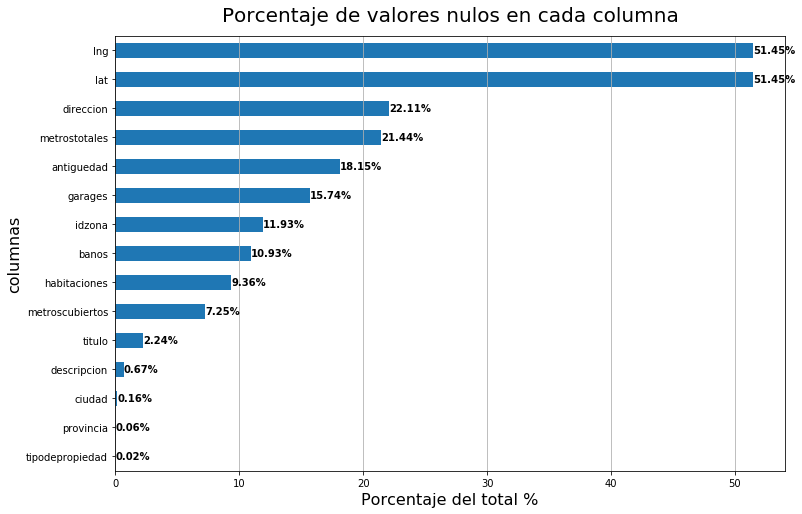

Cantidad de registros:  240000
Qué columnas tienen nas?


<Figure size 432x288 with 0 Axes>

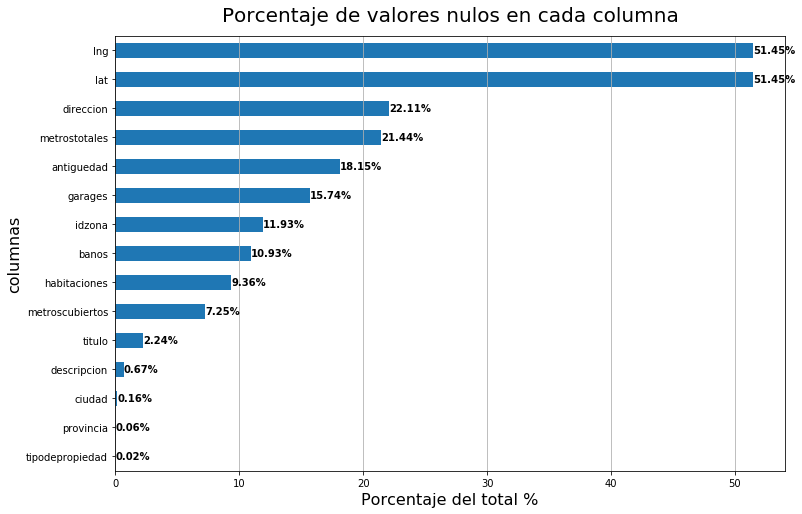

     Fill metros
       Terreno
       Apartamento
       Metros cubiertos null
       Metros totales null
       Terreno comercial
Cantidad de registros:  240000
Qué columnas tienen nas?


<Figure size 432x288 with 0 Axes>

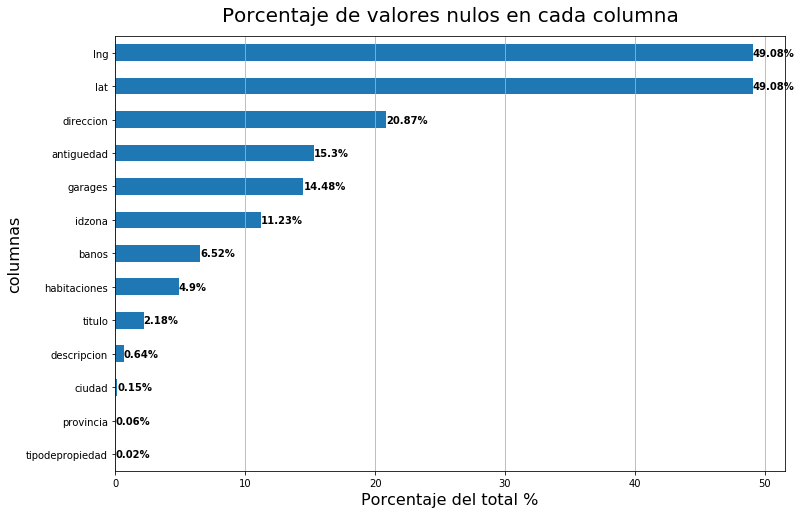

   Features engineering
     Fecha
     Amennities
     Ubicacion
     Features basadas en la descripción
Cantidad de registros:  240000
Qué columnas tienen nas?


<Figure size 432x288 with 0 Axes>

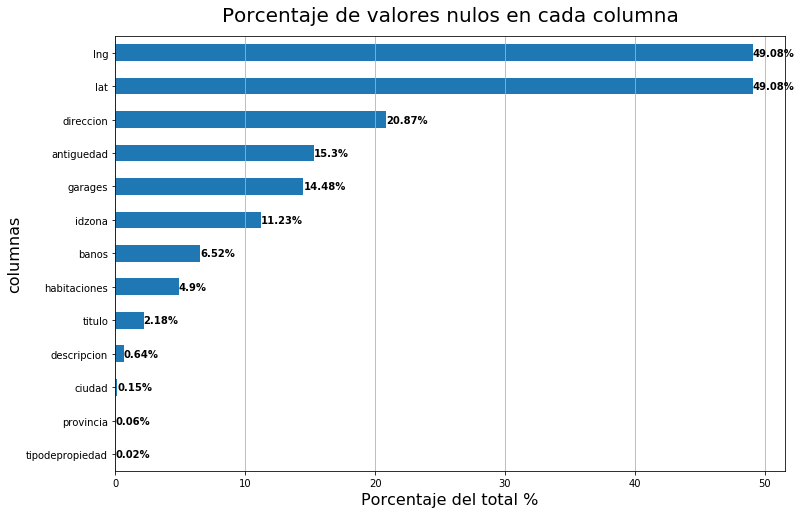

   Nulls
     Drop cols
Cantidad de registros:  240000
Qué columnas tienen nas?


<Figure size 432x288 with 0 Axes>

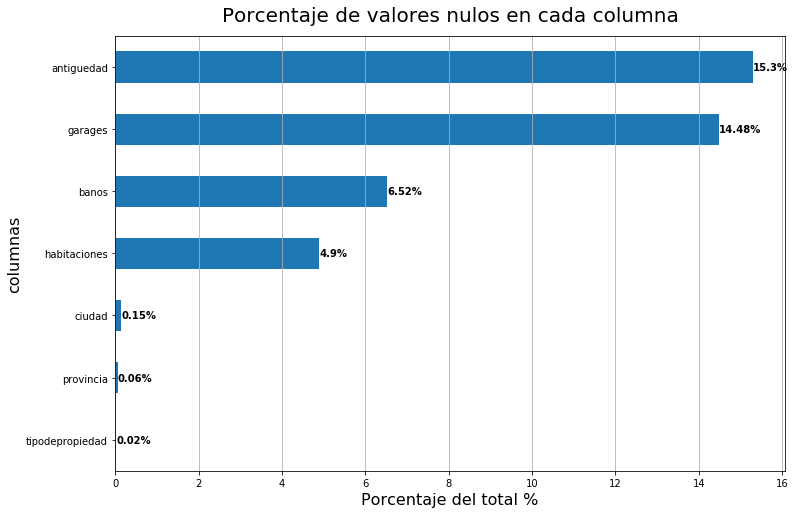

   Encoding
   Encoding top 5 propiedades
     Casa
     Apartamento
     Casa_en_condominio
     Terreno
     Local_Comercial
Cantidad de registros:  240000
Qué columnas tienen nas?


<Figure size 432x288 with 0 Axes>

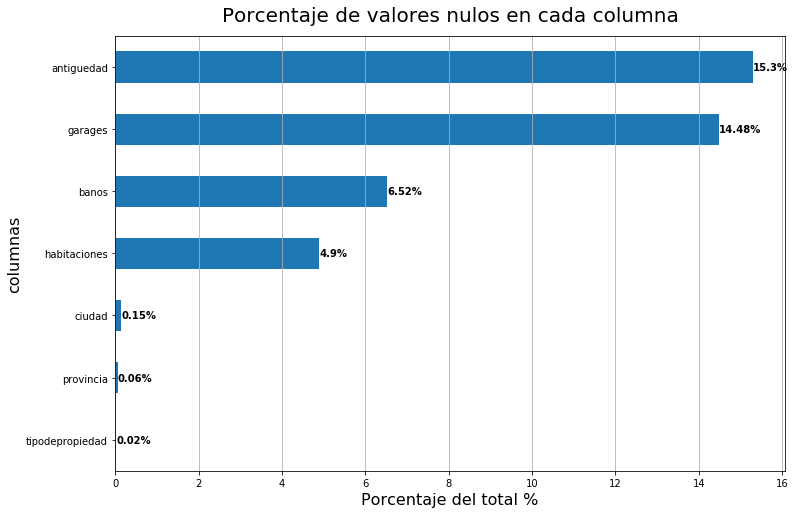

   drop nans in selected columns
Cantidad de registros:  240000
Qué columnas tienen nas?


<Figure size 432x288 with 0 Axes>

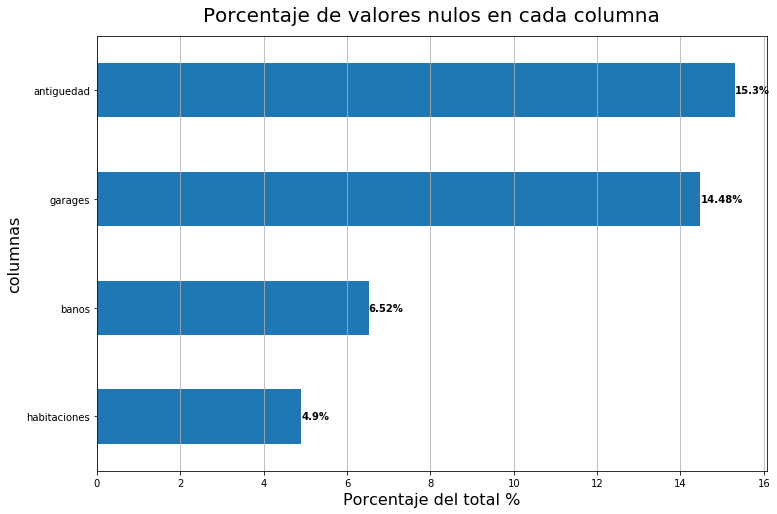

     Predict nulls
       fill with xgboost. Feature:  {'garages'}


KeyError: "['id'] not found in axis"

<Figure size 432x288 with 0 Axes>

In [2]:
# out = Inicializacion.Inicializacion()
preprocesamiento = Inicializacion()
data = preprocesamiento.getDataframes()

In [ ]:
p = ParamsGrid()
# print(ParamsGrid.param_random_forest)

In [ ]:
param_random_forest = {
        'bootstrap': [True, False], #method for sampling data points (with or without replacement)
        #'criterion': 'mse',
        'max_depth': [None, 10, 20, 50, 75, 100], #max number of levels in each decision tree
        'max_features': ['auto', 'sqrt'],  # np.arange(10, 12, 15) #max number of features considered for splitting a node
        #'max_leaf_nodes': None,
        #'min_impurity_decrease': 0.0,
        #'min_impurity_split': None,
        'min_samples_leaf': np.arange(1, 2, 4), #min number of data points allowed in a leaf node
        'min_samples_split': np.arange(2, 5, 10), #min number of data points placed in a node before the node is split
        #'min_weight_fraction_leaf': 0.0,
        'n_estimators': np.arange(75, 100, 200, ),  # n_estimators = number of trees in the foreset
        #'n_jobs': 1,
        #'oob_score': False,
#         'random_state': 42,
#         'verbose': 0,
#         'warm_start': False
    }


In [ ]:
print(data[0].shape)
print(data[1].shape)

In [ ]:
p.metodos['RandomForest']

In [ ]:

model = Prediction(data, p.metodos['RandomForest'][0], 'prediction', p.metodos['RandomForest'][1])
model.gridSearchTrain()
# model.save()

In [ ]:
type(model.gscv)

In [ ]:
answer = pd.DataFrame(list(zip(model.test_ids, model.predicted)), columns=['id', 'predicted'])
answer.to_csv('{}.csv'.format('result'), sep=',', index=False)


In [ ]:
# def nulls(df):
#     nulls = pd.DataFrame((df.isnull().sum().sort_values()/len(df)*100).round(2),columns=['porcentaje de NaN'])
#     if (nulls.sum() == 0).bool():
#         print("No hay nulls")
#     else:
#         nulls.drop(nulls.loc[nulls.loc[:,'porcentaje de NaN']<=0].index, inplace=True)
#         plt.figure(figsize=(12,8))
#         ax = nulls['porcentaje de NaN'].plot.barh()
#         ax.set_title('Porcentaje de valores nulos en cada columna',fontsize=20, y=1.02)
#         ax.set_xlabel('Porcentaje del total %', fontsize=16)
#         ax.set_ylabel('columnas', fontsize=16)
#         ax.grid(axis='x')

#         for y, x in enumerate(nulls['porcentaje de NaN']):
#             ax.text(x, y, s=str(x)+'%', color='black', fontweight='bold',va='center')

#         plt.show()

# df_test = pd.read_csv('data/test.csv')
# # nulls(df_test)
# nulls(dfs[0])
# nulls(dfs[1])

# dfs[1].info()
# out.df_xgb.garages_xgb.value_counts().sum()

In [ ]:
df_train = pd.read_csv('00-df_final.csv')


In [ ]:
df_train.columns

In [ ]:
plt.hist(df_train['habitaciones'])